In [1]:
from dpm.models import PoissonRegression, NegativeBinomialRegression
from functools import partial
import numpy as np
from dpm.visualize import plot_stats
from dpm.distributions import Poisson, NegativeBinomial
import torch

In [2]:
X = torch.rand((10000, 10))
X

tensor([[0.0246, 0.9404, 0.1397,  ..., 0.8605, 0.1629, 0.4116],
        [0.8842, 0.8249, 0.1382,  ..., 0.6478, 0.4082, 0.6042],
        [0.7884, 0.8734, 0.8809,  ..., 0.4823, 0.7901, 0.6915],
        ...,
        [0.1083, 0.2908, 0.6959,  ..., 0.0415, 0.4123, 0.5083],
        [0.9125, 0.0171, 0.1751,  ..., 0.1970, 0.2491, 0.9036],
        [0.8294, 0.2181, 0.7506,  ..., 0.9424, 0.7841, 0.6842]])

In [3]:
Beta = torch.rand(10, 1)
Beta

tensor([[0.0754],
        [0.2066],
        [0.3762],
        [0.3467],
        [0.8479],
        [0.6065],
        [0.5009],
        [0.3282],
        [0.4114],
        [0.4218]])

In [4]:
ret = (X @ Beta)
ret.shape

torch.Size([10000, 1])

In [5]:
y_model = Poisson(ret, learnable=False)
# y.shape

In [6]:
y = y_model.sample(1)

In [7]:
y.shape

torch.Size([1, 10000, 1])

In [8]:
y = y.view(-1, 1)

In [9]:
y_model.log_prob(ret).mean()

tensor(-1.3118)

In [10]:
model = PoissonRegression(input_dim=10)

d = model.model._create_dist(X)
d.log_prob(y).mean()

tensor(-2.0538, grad_fn=<MeanBackward1>)

In [11]:


stats = model.fit(X, y, epochs=2000)




In [12]:
d = model.model._create_dist(X)
d.log_prob(y).mean()

tensor(-1.7182, grad_fn=<MeanBackward1>)

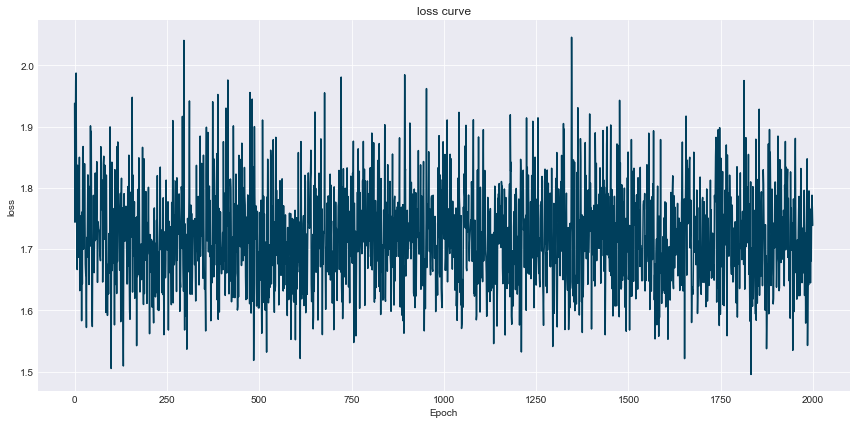

In [13]:
plot_stats(stats)

In [14]:
stats.data

{'loss': [1.9380364418029785,
  1.7439632415771484,
  1.8650803565979004,
  1.9752893447875977,
  1.987433671951294,
  1.8198496103286743,
  1.7046623229980469,
  1.6666102409362793,
  1.8369262218475342,
  1.8200881481170654,
  1.6865376234054565,
  1.82394278049469,
  1.7799084186553955,
  1.8499735593795776,
  1.6321651935577393,
  1.6909161806106567,
  1.6994235515594482,
  1.682753562927246,
  1.754774570465088,
  1.5829867124557495,
  1.7606141567230225,
  1.6433265209197998,
  1.8576651811599731,
  1.8675060272216797,
  1.699737787246704,
  1.7617594003677368,
  1.7359282970428467,
  1.839430332183838,
  1.7570972442626953,
  1.6755564212799072,
  1.6599669456481934,
  1.653940200805664,
  1.5720202922821045,
  1.718987226486206,
  1.6897321939468384,
  1.7518889904022217,
  1.8211760520935059,
  1.6865251064300537,
  1.8031305074691772,
  1.642275094985962,
  1.753523349761963,
  1.7369979619979858,
  1.7048403024673462,
  1.9012200832366943,
  1.7654151916503906,
  1.892256498

In [15]:
(model.predict(X) == y).float().mean()

tensor(0.2098)

In [16]:
model.predict(X)

tensor([[4.],
        [2.],
        [5.],
        ...,
        [4.],
        [2.],
        [1.]], grad_fn=<SqueezeBackward1>)

In [17]:
[p for p in model.parameters()]

[Parameter containing:
 tensor([[0.0232, 0.2173, 0.5046, 0.4515, 0.7173, 0.6743, 0.5557, 0.3617, 0.4723,
          0.4872]], requires_grad=True), Parameter containing:
 tensor([-0.3023], requires_grad=True)]

In [18]:
Beta

tensor([[0.0754],
        [0.2066],
        [0.3762],
        [0.3467],
        [0.8479],
        [0.6065],
        [0.5009],
        [0.3282],
        [0.4114],
        [0.4218]])

In [19]:
ret

tensor([[1.7688],
        [1.7660],
        [3.0296],
        ...,
        [1.2445],
        [1.8670],
        [2.7741]])

In [20]:
t = model.model._create_dist(X)

In [21]:
t

Poisson()

In [22]:
y_model.kl(t).sum()

tensor(16.5908, grad_fn=<SumBackward0>)

In [23]:
nb_model = NegativeBinomialRegression(input_dim=10)
stats=None

In [24]:
stats = nb_model.fit(X, y, epochs=2000, stats=stats)

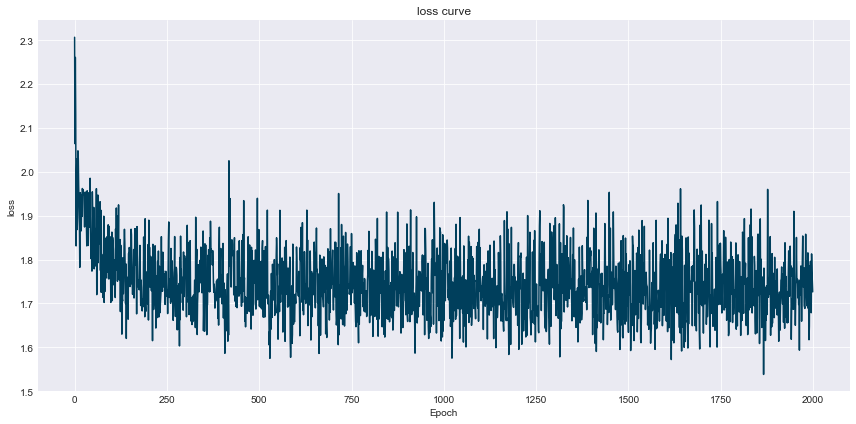

In [25]:
plot_stats(stats)

In [26]:
model.predict(X)

tensor([[4.],
        [0.],
        [1.],
        ...,
        [2.],
        [3.],
        [5.]], grad_fn=<SqueezeBackward1>)

In [27]:
y

tensor([[2.],
        [0.],
        [2.],
        ...,
        [1.],
        [2.],
        [2.]])

In [28]:
t_c, p = nb_model(X)

In [29]:
(y - nb_model.predict(X)).pow(2).sum()

tensor(48083.)

In [30]:
-t.log_prob(y).mean()

tensor(1.7182, grad_fn=<NegBackward>)

In [31]:
-t.log_prob(nb_model.predict(X)).mean()

tensor(1.8215, grad_fn=<NegBackward>)

In [43]:
m = NegativeBinomial([10, 4], [0.5, 0.5])

In [44]:
X = m.sample(6)
X

tensor([[13.,  6.],
        [ 8.,  3.],
        [18.,  2.],
        [ 9.,  8.],
        [14.,  4.],
        [10.,  5.]])

In [45]:
m.log_prob(X)

tensor([[-2.8252, -2.5007],
        [-2.3780, -1.8563],
        [-4.0479, -1.8563],
        [-2.3780, -3.2118],
        [-3.0219, -1.9898],
        [-2.4293, -2.2130]], grad_fn=<SubBackward0>)

In [46]:
m.log_prob(X).sum(-1)

tensor([-5.3259, -4.2343, -5.9042, -5.5898, -5.0117, -4.6423],
       grad_fn=<SumBackward2>)

In [47]:
m.skewness

tensor([0.6708, 1.0607], grad_fn=<DivBackward0>)